# Air transportation Ocurrences
## Preprocessing

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../scripts")

In [4]:
from data_loader import load_data_from_csv, load_data_from_temp
from common.export_csv import exportDataVersion
import pandas as pd
import numpy as np

### <font color=#43599e>Loading Data</font>

In [6]:
#Load data
df = load_data_from_csv('fullData_V1.csv')
#Data length
print(f"# of rows 'fullData_V1.csv': {len(df)}")

# of rows 'fullData_V1.csv': 48454


In [7]:
df = df.replace("NaN", np.nan)
print(df.isnull().sum())
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.head()

OccID                                  0
OccNo                                  0
AirportID_AirportName              26981
AirportID_CountryID_DisplayEng     26981
AirportID_ProvinceID_DisplayEng    27603
                                   ...  
DangerousGoodEnum_DisplayEng           0
ICAODepart                         22717
ICAODestination                        0
SurvivableEnum_DisplayEng              0
ICAO_DisplayEng                        0
Length: 80, dtype: int64


,OccID,OccNo,AirportID_AirportName,AirportID_CountryID_DisplayEng,AirportID_ProvinceID_DisplayEng,Location,Latitude,LatEnum_DisplayEng,Longitude,LongEnum_DisplayEng,ICAO,BearingID_Abbr,BearingID_CompassPoint,BearingID_Highest,BearingID_Lowest,BearingID_Middle,CountryID_DisplayEng,Distance,DistanceEnumEng,LocationDescription,OccClassID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccRegionID_DisplayEng,OccTime,OccTypeID_DisplayEng,TsbInvolveID_DisplayEng,OceanID_DisplayEng,PositionTypeEnum_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,ReportedByID_DisplayEng,RespRegionID_DisplayEng,SeriousIncidentEnum_DisplayEng,TimeZoneID_DisplayEng,IIC_FullName,Summary,CommonName,TotalFatalCount,TotalMinorCount,TotalNoneCount,TotalSeriousCount,TotalUnknownCount,NoAircraftInvolved,InjuriesEnum_DisplayEng,DeployedEnum_DisplayEng,SafetyCommIssuedEnum,AcID,AircraftID,AircraftVersion,RegistrationNo,SerialNo,AircraftTypeID_DisplayEng,AircraftModelID_DisplayEng,AircraftMakeID_DisplayEng,AircraftSeries,AircraftCommonNameID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,WeightCategoryID_MaxWeightCat,WeightCategoryID_MinWeightCat,LandingGearID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,MaxTakeOffWeight,NumberOfEngine,DamageLevelID_DisplayEng,DestAirportID_AirportName,DepartAirportID,DepartAirportID_AirportName,FlightPlanTypeID_DisplayEng,OperationTypeID_DisplayEng,CarsSubpartID_DisplayEng,FlightNo,DangerousGoodEnum_DisplayEng,ICAODepart,ICAODestination,SurvivableEnum_DisplayEng,ICAO_DisplayEng
0,150172,A17A0047,NaN,NaN,NaN,NaN,46.284740,N,63.644120,W,NaN,NaN,NaN,0.00,0.00,0.0,CANADA,0.0,NaN,"Albany, PEI private grass strip",CLASS 5,7/10/2017 12:00:00 AM,NaN,ATLANTIC,14:15:00,ACCIDENT,RESPONSIBLE,NaN,DDMMSS.SS,PRINCE EDWARD ISLAND,7/10/2017 12:00:00 AM,OWNER OF AIRCRAFT,ATLANTIC,NaN,ADT,"Boothe, Daphne",C-IICE a privately operated Quad City Challeng...,Albany PEI Challenger II Special ultralightC-I...,0,1,0,0,0,0,Yes,No,45,65259,130203,2.0,C-IICE,CH2-0412-LSS-S5,ADVANCED ULTRALIGHT,CHALLENGER 11 SPECIAL,CHALLENGER,CH2-0412-LSS-S50-0210,NaN,NaN,PRIVATE,0-2250 KG (0-4960 LBS),2250,0,TRICYCLE FIXED,LIGHT,2015,435.0,1,SUBSTANTIAL,NaN,0,NaN,NaN,PLEASURE/TRAVEL,RECREATIONAL AVIATION,NaN,No,NaN,\r,\N,COLLISION WITH OBSTACLE(S) DURING TAKEOFF AND ...
1,150171,A17C0081,Industrial Park,CANADA,MANITOBA,Gimli,50.772778,N,96.821389,W,CYGM,NE,Northeast,56.25,33.75,45.0,CANADA,12.0,Nautical miles,NaN,CLASS 5,7/10/2017 12:00:00 AM,ENGINE (i),CENTRAL,13:55:00,INCIDENT,RESPONSIBLE,NaN,DDMMSS.SS,MANITOBA,7/10/2017 12:00:00 AM,OPERATOR,CENTRAL,No,UTC,"ROSS, DAVID",C-GWCP a Piper PA-32-300 aircraft operated by ...,CYGM 12 nm NE MHA Enterprises PA-32-300 C-GWCP...,0,0,1,0,0,0,No,No,45,65262,130204,2.0,C-GWCP,32-40539,AEROPLANE,PA-32-300,PIPER,NaN,NaN,MHA ENTERPRISES,COMMERCIAL,0-2250 KG (0-4960 LBS),2250,0,TRICYCLE FIXED,LIGHT,1968,1542.0,1,MINOR,WINNIPEG/ST. ANDREWS,1680,ST. THERESA POINT,VFR FLIGHT ITINERARY,AIR TRANSPORT,703 - AIR TAXI,C-GWCP,Unknown,CYST,CYAV\r,\N,SYSTEM/COMPONENT FAILURE OR MALFUNCTION (NON-P...
2,150170,A17F0159,San Francisco Intl,UNITED STATES,CALIFORNIA,San Francisco,37.638169,N,122.375428,W,KSFO,NaN,NaN,0.00,0.00,0.0,UNITED STATES,0.0,NaN,NaN,CLASS 5,7/8/2017 12:00:00 AM,RISK OF COLLISION (x),FOREIGN,6:56:00,INCIDENT,ACCREDITED REP 3,NaN,DDMMSS.SS,CALIFORNIA,7/9/2017 12:00:00 AM,FOREIGN AIB,HEAD OFFICE,Yes,UTC,"Harvey, Beverley",C-FKCK an Airbus 320-200 aircraft operated by ...,USA (KSFO) Air Canada A320-200 ACA759 (C-FKCK)...,0,0,140,0,0,0,No,No,45,23548,50927,12.0,C-FKCK,265,AEROPLANE,A320-200,AIRBUS,211,NaN,AIR CANADA,COMMERCIAL,27001-272000 KG (59526-599650 LBS),272000,27001,TRICYCLE ALL RETRACT,MEDIUM,1991,75500.0,2,NONE,San Francisco Intl,1010,Lester B. Pearson Intl,ICAO IFR FLIGHT PLAN,AIR TRANSPORT,705 - AIRLINER,ACA759,No,CYYZ,KSFO\r,Yes\r,NAVIGATION ERRORS (NAV)
3,150169,A17C0080,FORT FRANCES MUNI,CANADA,ONTARIO,FORT FRANCES,48.650000,N,93.500000,W,CYAG,W,West,281.25,258.75

### <font color=#43599e>Deleting features without data</font>

In [9]:
df = df.drop(columns=['BearingID_Abbr', 'BearingID_CompassPoint', 'AirportID_AirportName', 
              'AirportID_CountryID_DisplayEng', 'Location', 'AirportID_ProvinceID_DisplayEng',
             'ICAO', 'BearingID_Highest', 'BearingID_Lowest', 'BearingID_Middle',
              'Distance','DistanceEnumEng', 'LocationDescription',
              'DistanceEnumEng', 'SeriousIncidentEnum_DisplayEng', 'TimeZoneID_DisplayEng',
             'IIC_FullName','CommonName', 'TotalFatalCount', 'TotalMinorCount', 'TotalNoneCount',
             'TotalSeriousCount', 'TotalUnknownCount', 'NoAircraftInvolved', 'SafetyCommIssuedEnum', 'AcID',
             'AircraftVersion','AircraftID', 'SerialNo', 'AircraftModelID_DisplayEng', 'AircraftSeries', 'AircraftCommonNameID_DisplayEng',
             'WeightCategoryID_MaxWeightCat', 'WeightCategoryID_MinWeightCat', 'MaxTakeOffWeight', 'DestAirportID_AirportName',
             'DepartAirportID', 'DepartAirportID_AirportName', 'FlightPlanTypeID_DisplayEng', 'CarsSubpartID_DisplayEng', 
             'FlightNo', 'DangerousGoodEnum_DisplayEng', 'ICAODestination', 'SurvivableEnum_DisplayEng', 'ICAO_DisplayEng'])

In [10]:
print(df.isnull().sum())

OccID                                      0
OccNo                                      0
Latitude                                   0
LatEnum_DisplayEng                      1423
Longitude                                  0
LongEnum_DisplayEng                     1608
CountryID_DisplayEng                       0
OccClassID_DisplayEng                      0
OccDate                                    0
OccIncidentTypeID_DisplayEng           20182
OccRegionID_DisplayEng                    30
OccTime                                  301
OccTypeID_DisplayEng                       0
TsbInvolveID_DisplayEng                11894
OceanID_DisplayEng                     47168
PositionTypeEnum_DisplayEng                0
ProvinceID_DisplayEng                   2442
InitTSBNotifDate                           0
ReportedByID_DisplayEng                    0
RespRegionID_DisplayEng                  131
Summary                                   97
InjuriesEnum_DisplayEng                    0
DeployedEn

### <font color=#43599e>Handling nulls and converting features</font>

#### OccNo
As is a identifier number we can delete it 

In [12]:
df = df.drop(columns = "OccNo")

#### LatEnum_DisplayEng and LongEnum_DisplayEng 

In [14]:
from preprocessing.constants_preprocessing import OCEAN_COORDINATES, OCEAN_PROVINCES_COORDINATES, COUNTRY_PROVINCE_COORDINATES 
from preprocessing.constants_preprocessing import COUNTRIES_COORDINATES, COUNTRIES_CARDINAL_DIRECTIONS, OCEAN_CARDINAL_DIRECTIONS

In [15]:
columns_to_include = ["Latitude", "LatEnum_DisplayEng", "Longitude", "LongEnum_DisplayEng", "CountryID_DisplayEng", "OccRegionID_DisplayEng", "OceanID_DisplayEng", 
                      "ProvinceID_DisplayEng", "RespRegionID_DisplayEng"] 

filtered_cardinal_directions = df.copy()
filtered_cardinal_directions = df[
    (df['LatEnum_DisplayEng'].isna() | df['LongEnum_DisplayEng'].isna()) &
    (~df["Latitude"].isna() & df["Latitude"] != 0) &   #Because we will handle it separately
    (~df["Longitude"].isna() & df["Longitude"] != 0)
]

filtered_cardinal_directions = filtered_cardinal_directions[columns_to_include]
filtered_cardinal_directions.head()

,Latitude,LatEnum_DisplayEng,Longitude,LongEnum_DisplayEng,CountryID_DisplayEng,OccRegionID_DisplayEng,OceanID_DisplayEng,ProvinceID_DisplayEng,RespRegionID_DisplayEng
5000,50.033333,NaN,8.566667,E,GERMANY,FOREIGN,NaN,NaN,HEAD OFFICE
5052,51.466667,NaN,0.450000,NaN,UNITED KINGDOM,FOREIGN,NaN,NaN,ONTARIO
5356,51.466667,NaN,0.450000,NaN,UNITED KINGDOM,FOREIGN,NaN,NaN,ONTARIO
5563,51.466667,NaN,0.450000,NaN,UNITED KINGDOM,FOREIGN,NaN,NaN,ONTARIO
5799,50.033333,NaN,8.566667,E,GERMANY,FOREIGN,NaN,NaN,HEAD OFFICE


In [16]:
unique_countries = filtered_cardinal_directions["CountryID_DisplayEng"].unique()
unique_provinces = filtered_cardinal_directions["ProvinceID_DisplayEng"].unique()

print(f"Number of rows: {len(filtered_cardinal_directions)}")
print(unique_countries)
print(unique_provinces)

Number of rows: 248
['GERMANY' 'UNITED KINGDOM' 'DENMARK' 'CANADA' 'UNITED STATES' 'IRELAND'
 'FRANCE' 'SPAIN' 'AZORES' 'GREENLAND' 'ICELAND' 'INTERNATIONAL WATERS']
[nan 'QUEBEC' 'NEW YORK' 'ILLINOIS' 'ONTARIO' 'NOVA SCOTIA'
 'BRITISH COLUMBIA' 'NORTHWEST TERRITORIES' 'MANITOBA' 'ALBERTA'
 'NEWFOUNDLAND AND LABRADOR' 'NEW BRUNSWICK' 'SOUTH CAROLINA'
 'PRINCE EDWARD ISLAND']


In [17]:
def calculate_cardinal_directions(row):
    if(row["CountryID_DisplayEng"] in COUNTRIES_CARDINAL_DIRECTIONS):
        return COUNTRIES_CARDINAL_DIRECTIONS[row["CountryID_DisplayEng"]];
    if not pd.isna(row["OceanID_DisplayEng"]):
        if(row["OceanID_DisplayEng"] in OCEAN_CARDINAL_DIRECTIONS):
            return OCEAN_CARDINAL_DIRECTIONS[row["OceanID_DisplayEng"]]
    return [np.nan, np.nan]

In [18]:
df_handling_cardinal_directions = df.copy()
for idx, row in filtered_cardinal_directions.iterrows():
    car_dir_lat, car_dir_lon = calculate_cardinal_directions(row)  #New values
    #Update data in original df
    df_handling_cardinal_directions.at[idx, "LatEnum_DisplayEng"] = car_dir_lat        
    df_handling_cardinal_directions.at[idx, "LongEnum_DisplayEng"] = car_dir_lon 

In [19]:
df = df_handling_cardinal_directions.copy()

#### Latitude and Longitude
We have 4 columns Latitude	LatEnum_DisplayEng	Longitude	LongEnum_DisplayEng, we could delete the displays and add signs to the coordinates.

In [21]:
#Latitude and Longitude columns are in numeric format
df["Latitude"] = df["Latitude"].astype(float)
df["Longitude"] = df["Longitude"].astype(float)

#Apply signs to Latitude and Longitude based on orientation columns
#LatEnum_DisplayEng: Positive if "N" (North), Negative if "S" (South)
df["Latitude"] = df["Latitude"] * df["LatEnum_DisplayEng"].apply(lambda x: 1 if x == "N" else -1)

#LongEnum_DisplayEng: Positive if "E" (East), Negative if "W" (West)
df["Longitude"] = df["Longitude"] * df["LongEnum_DisplayEng"].apply(lambda x: 1 if x == "E" else -1)

#Drop the orientation columns since they are no longer needed
df.drop(columns=["LatEnum_DisplayEng", "LongEnum_DisplayEng"], inplace=True)

Now we can handle null values. We dont have nulls but we have 0,0 values. 

In [23]:
df_handling_lat_lon = df.copy(); 
filtered_df_lat_lon = df[(df_handling_lat_lon["Latitude"] == 0) & (df_handling_lat_lon["Longitude"] == 0)]
print(f"Number of rows: {len(filtered_df_lat_lon)}")

Number of rows: 1501


In [24]:
columns_to_include.remove("LatEnum_DisplayEng")
columns_to_include.remove("LongEnum_DisplayEng")

filtered_df_lat_lon = filtered_df_lat_lon[columns_to_include]
filtered_df_lat_lon.head(10)

,Latitude,Longitude,CountryID_DisplayEng,OccRegionID_DisplayEng,OceanID_DisplayEng,ProvinceID_DisplayEng,RespRegionID_DisplayEng
14,-0.0,-0.0,INTERNATIONAL WATERS,FOREIGN,NORTH ATLANTIC OCEAN,NaN,HEAD OFFICE
24,0.0,-0.0,CANADA,PACIFIC,NaN,BRITISH COLUMBIA,PACIFIC
30,-0.0,-0.0,INTERNATIONAL WATERS,FOREIGN,NORTH ATLANTIC OCEAN,NaN,HEAD OFFICE
86,0.0,-0.0,CANADA,ATLANTIC,NaN,NOVA SCOTIA,ATLANTIC
100,0.0,-0.0,CANADA,PACIFIC,NaN,BRITISH COLUMBIA,PACIFIC
234,-0.0,-0.0,CANADA,PACIFIC,NaN,BRITISH COLUMBIA,PACIFIC
449,-0.0,-0.0,UNITED STATES,FOREIGN,NaN,NORTH CAROLINA,HEAD OFFICE
467,0.0,-0.0,CANADA,ATLANTIC,NaN,QUEBEC,ATLANTIC
890,-0.0,-0.0,CANADA,QUEBEC,NaN,QUEBEC,QUEBEC
1224,-0.0,-0.0,CANADA,QUEBEC,NaN,QUEBEC,QUEBEC


In [26]:
def calculate_coordinates(row):
    if(row["OceanID_DisplayEng"] is not None and not pd.isna(row["OceanID_DisplayEng"])):
        return OCEAN_COORDINATES[row["OceanID_DisplayEng"]]
        
    elif row["CountryID_DisplayEng"] == "INTERNATIONAL WATERS":
        if(row["OceanID_DisplayEng"] is not None): 
            return OCEAN_COORDINATES[row["OceanID_DisplayEng"]]
            
    elif(row["OccRegionID_DisplayEng"] in OCEAN_PROVINCES_COORDINATES):
        if(row["ProvinceID_DisplayEng"] in OCEAN_PROVINCES_COORDINATES[row["OccRegionID_DisplayEng"]]):
            return OCEAN_PROVINCES_COORDINATES[row["OccRegionID_DisplayEng"]][row["ProvinceID_DisplayEng"]]

    elif(row["CountryID_DisplayEng"] in COUNTRY_PROVINCE_COORDINATES):
        if(row["ProvinceID_DisplayEng"] in COUNTRY_PROVINCE_COORDINATES[row["CountryID_DisplayEng"]]):
            return COUNTRY_PROVINCE_COORDINATES[row["CountryID_DisplayEng"]][row["ProvinceID_DisplayEng"]]
    
    elif(pd.isna(row["ProvinceID_DisplayEng"]) and row["OccRegionID_DisplayEng"] == "FOREIGN"):
        if(row["CountryID_DisplayEng"] in COUNTRIES_COORDINATES):
            return COUNTRIES_COORDINATES[row["CountryID_DisplayEng"]]
    return [0,0]

In [27]:
for idx, row in filtered_df_lat_lon.iterrows():
    new_lat, new_lon = calculate_coordinates(row)  #New values
    #Update data in original df
    df_handling_lat_lon.at[idx, "Latitude"] = new_lat        
    df_handling_lat_lon.at[idx, "Longitude"] = new_lon       


In [28]:
filtered_df_lat_lon = df_handling_lat_lon[(df_handling_lat_lon["Latitude"] == 0) & (df_handling_lat_lon["Longitude"] == 0)]
filtered_df_lat_lon = filtered_df_lat_lon[columns_to_include]
filtered_df_lat_lon.head(10)

,Latitude,Longitude,CountryID_DisplayEng,OccRegionID_DisplayEng,OceanID_DisplayEng,ProvinceID_DisplayEng,RespRegionID_DisplayEng
3887,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
6330,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,ONTARIO
7321,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,QUEBEC
8046,0.0,0.0,CANADA,WESTERN,NaN,NaN,WESTERN
9519,0.0,0.0,UNITED KINGDOM,WESTERN,NaN,NaN,WESTERN
15081,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
15363,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
17944,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,ONTARIO
22465,0.0,0.0,MEXICO,QUEBEC,NaN,NaN,QUEBEC
22832,0.0,0.0,HONG KONG,WESTERN,NaN,NaN,WESTERN


In [29]:
print(f"Number of rows: {len(filtered_df_lat_lon)}")

Number of rows: 36


We could delete those 36 registers as we dont have enough information to know its approximate location

In [31]:
#Get index of the rows to delete 
rows_to_remove = df_handling_lat_lon[(df_handling_lat_lon["Latitude"] == 0) & 
                                     (df_handling_lat_lon["Longitude"] == 0)].index
#Removing the rows 
df_handling_lat_lon = df_handling_lat_lon.drop(rows_to_remove)

#Reseting index
df_handling_lat_lon.reset_index(drop=True, inplace=True)

In [32]:
df = df_handling_lat_lon.copy()

#### CountryID_DisplayEng
Doesn't have null values 
#### OccClassID
It has CLASS 5 for the majority of the dataset, we could delete this feature

In [34]:
df = df.drop(columns=['OccClassID_DisplayEng'])

#### OccDate
We could delete the hour in the date as we have a time feature and have yyyy-MM-dd

In [36]:
#Converting the OccDate column to datetime format
df["OccDate"] = pd.to_datetime(df["OccDate"], format="%m/%d/%Y %I:%M:%S %p")

#Removing the time part by formatting to only include the date
df["OccDate"] = df["OccDate"].dt.date

#### OccIncidentTypeID_DisplayEng
This value has many null values because it only has values when the OccType is an incident.
#### OccRegionID_DisplayEng
As we have just have 10 values, they are not specific and we have the field ProvinceID_DisplayEng, we could delete it. 

In [38]:
region_values = df["OccRegionID_DisplayEng"].unique()
print(region_values)

['ATLANTIC' 'CENTRAL' 'FOREIGN' 'ONTARIO' 'PACIFIC' 'QUEBEC' 'WESTERN'
 'HEAD OFFICE' 'NORTH ATLANTIC' nan]


In [39]:
df = df.drop(columns=["OccRegionID_DisplayEng"])

#### OccTime
We could set a default time of 12:00 pm for the 301 empty rows

In [41]:
df["OccTime"] = pd.to_datetime(
    df["OccTime"], 
    format="%H:%M:%S",  
    errors="coerce"
).fillna(pd.to_datetime("12:00:00", format="%H:%M:%S"))

df["OccTime"] = df["OccTime"].dt.time


#### OccTypeID_DisplayEng
Doesnt hava null values 
#### TsbInvolveID_DisplayEng                
We could delete this column because we have more than 11.000 nulls 

In [43]:
df = df.drop(columns = "TsbInvolveID_DisplayEng")

#### OceanID_DisplayEng                     
It has more than 47.000 nulls because is showing the ocean locations, but we already have lat and lon and we could use that to know the location, so we can delete it.

In [45]:
df = df.drop(columns = "OceanID_DisplayEng")

#### PositionTypeEnum_DisplayEng                
All values are using the same position type lon and lat, so we can delete this column

In [47]:
df = df.drop(columns = "PositionTypeEnum_DisplayEng")

#### ProvinceID_DisplayEng                   
We have 2442 nulls, we can know the province because of the coordinates 

In [49]:
from common.export_temp_csv import export_csv_temp

In [50]:
df_handling_null_province = df.copy()
df_handling_null_province = df_handling_null_province[df_handling_null_province["ProvinceID_DisplayEng"].isna()]
print(f"Nulls: {len(df_handling_null_province)}")

Nulls: 2406


In [51]:
#export_csv_temp(df_handling_null_province, "null_provinces")

With OpenCage API we can fill some of the empty Provinces. Then we could convert it into a dicctionary to fill the provinces in the original dataset

In [53]:
from preprocessing.region_id.fill_regions_process import fill_regions_in_temp

In [54]:
#fill_regions_in_temp(df_handling_null_province.copy())

In [55]:
df_temp_filled_provinces = load_data_from_temp("null_provinces_filled.csv")

In [56]:
province_mapping = df_temp_filled_provinces.set_index('OccID')['PROVINCE'].to_dict()
df['ProvinceID_DisplayEng'] = df.apply(
    lambda row: province_mapping[row['OccID']]
    if pd.isnull(row['ProvinceID_DisplayEng']) and row['OccID'] in province_mapping
    else row['ProvinceID_DisplayEng'],
    axis=1
)

In [57]:
df_handling_null_province = df.copy()
df_handling_null_province = df_handling_null_province[df_handling_null_province["ProvinceID_DisplayEng"] == "UNKNOWN"]
print(f"Nulls: {len(df_handling_null_province)}")
df_handling_null_province.head()

Nulls: 1623


,OccID,Latitude,Longitude,CountryID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccTime,OccTypeID_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,ReportedByID_DisplayEng,RespRegionID_DisplayEng,Summary,InjuriesEnum_DisplayEng,DeployedEnum_DisplayEng,RegistrationNo,AircraftTypeID_DisplayEng,AircraftMakeID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,LandingGearID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,NumberOfEngine,DamageLevelID_DisplayEng,OperationTypeID_DisplayEng,ICAODepart
8,150161,51.300000,-128.816667,CANADA,2017-07-07,EMERGENCY/PRIORITY (xi),01:10:00,INCIDENT,UNKNOWN,7/7/2017 12:00:00 AM,NAV CANADA,PACIFIC,N174DZ a Boeing 767-300 aircraft operated by D...,No,No,N174DZ,AEROPLANE,BOEING,DELTA AIR LINES,COMMERCIAL,27001-272000 KG (59526-599650 LBS),TRICYCLE ALL RETRACT,HEAVY,1998,2,NONE,AIR TRANSPORT,KSEA
14,150155,48.000000,-50.000000,INTERNATIONAL WATERS,2017-07-02,UNABLE TO PERFORM (vi),05:30:00,INCIDENT,UNKNOWN,7/4/2017 12:00:00 AM,OPERATOR,HEAD OFFICE,C-GHLQ a Boeing 767-300 aircraft operated by A...,Yes,No,C-GHLQ,AEROPLANE,BOEING,AIR CANADA ROUGE,COMMERCIAL,27001-272000 KG (59526-599650 LBS),TRICYCLE ALL RETRACT,HEAVY,2001,2,NONE,AIR TRANSPORT,CYUL
30,150130,48.000000,-50.000000,INTERNATIONAL WATERS,2017-06-25,UNABLE TO PERFORM (vi),09:10:00,INCIDENT,UNKNOWN,6/27/2017 12:00:00 AM,OPERATOR,HEAD OFFICE,C-GHLV a Boeing 767-300 aircraft operated by A...,No,No,C-GHLV,AEROPLANE,BOEING,AIR CANADA ROUGE,COMMERCIAL,27001-272000 KG (59526-599650 LBS),TRICYCLE ALL RETRACT,HEAVY,2001,2,NONE,AIR TRANSPORT,CYYZ
49,150107,59.266667,-46.316667,CANADA,2017-06-21,ENGINE (i),17:54:00,INCIDENT,UNKNOWN,6/21/2017 12:00:00 AM,NAV CANADA,ATLANTIC,C-GOAB a private Dassault Falcon 2000EX aircra...,No,No,C-GOAB,AEROPLANE,DASSAULT-BREGUET,Starlink Aviation Inc,PRIVATE,5701-27000 KG (12566-59525 LBS),TRICYCLE ALL RETRACT,MEDIUM,2006,2,NONE,PLEASURE/TRAVEL,EKAH
63,150089,48.000000,-44.500000,CANADA,2017-06-16,EMERGENCY/PRIORITY (xi),14:04:00,INCIDENT,UNKNOWN,6/16/2017 12:00:00 AM,NAV CANADA,ATLANTIC,C-GFAT an Airbus 310-300 aircraft operated by ...,No,No,C-GFAT,AEROPLANE,AIRBUS,AIR TRANSAT,COMMERCIAL,27001-272000 KG (59526-599650 LBS),TRICYCLE ALL RETRACT,HEAVY,1991,2,NONE,AIR TRANSPORT,LPPT


In [58]:
#TODO: Get province manually and finish this part 

In [59]:
#export_csv_temp(df_handling_null_province, "null_provinces_P2")

In [60]:
df_temp_filled_provinces_P2 = load_data_from_temp("null_provinces_P2_filled.csv")

In [61]:
province_mapping = df_temp_filled_provinces_P2.set_index('OccID')['PROVINCE'].to_dict()
df['ProvinceID_DisplayEng'] = df.apply(
    lambda row: province_mapping[row['OccID']]
    if row['ProvinceID_DisplayEng'] == 'UNKNOWN' and row['OccID'] in province_mapping
    else row['ProvinceID_DisplayEng'],
    axis=1
)


#### InitTSBNotifDateDoes not have nulls but we can convert the format to be the same as the other date and delete the hours as it is generally 12


In [63]:
#Converting the OccDate column to datetime format
df["InitTSBNotifDate"] = pd.to_datetime(df["InitTSBNotifDate"], format="%m/%d/%Y %I:%M:%S %p")

#Removing the time part by formatting to only include the date
df["InitTSBNotifDate"] = df["InitTSBNotifDate"].dt.date

#### ReportedByID_DisplayEng                    
Does not have nulls but have unknowns 

In [65]:
unknown_count = (df["ReportedByID_DisplayEng"] == "UNKNOWN").sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 39134


We can delete this feature as it has almost all cells as unknown

In [67]:
df = df.drop(columns = "ReportedByID_DisplayEng")

#### RespRegionID_DisplayEng                  
As it does not have valuable information we could delete it 

In [69]:
df = df.drop(columns = "RespRegionID_DisplayEng")

#### Summary
We will create a new file just with summary in english because we have cells in french

In [71]:
from preprocessing.translations.translation_process import process_translation, process_translation_different_encoding

In [72]:
#process_translation(df.copy())

In [73]:
df_temp_eng_summaries = load_data_from_temp("eng_summaries.csv")

In [74]:
summary_mapping = df_temp_eng_summaries.set_index('OccID')['Summary'].to_dict()
df['Summary'] = df.apply(
    lambda row: summary_mapping[row['OccID']] if row['OccID'] in summary_mapping else row['Summary'],
    axis=1
)

Some of the summaries are in different encoding, we will handle it separately

In [76]:
from unidecode import unidecode

In [77]:
#summaries_in_french = load_data_from_temp("french_summaries_accidents.csv")
#summaries_in_french['Summary'] = summaries_in_french['Summary'].apply(unidecode)
#process_translation_different_encoding(summaries_in_french)

In [78]:
df_temp_eng_summaries_P2 = load_data_from_temp("eng_summaries_P2.csv")

In [79]:
summary_mapping_P2 = df_temp_eng_summaries_P2.set_index('OccID')['Summary'].to_dict()
df['Summary'] = df.apply(
    lambda row: summary_mapping_P2[row['OccID']] if row['OccID'] in summary_mapping_P2 else row['Summary'],
    axis=1
)

In [80]:
unknown_count = (df["Summary"].isna()).sum()
print(f"Number of nulls: {unknown_count}")

Number of nulls: 97


#### InjuriesEnum_DisplayEng


In [82]:
unknown_count = (df["InjuriesEnum_DisplayEng"] == "Unknown").sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 65


In [83]:
condition = df["InjuriesEnum_DisplayEng"] == "Unknown"

df.loc[condition & (df["DamageLevelID_DisplayEng"] == "NONE"), "InjuriesEnum_DisplayEng"] = "No"
df.loc[condition & ((df["DamageLevelID_DisplayEng"] == "SUBSTANTIAL") | (df["DamageLevelID_DisplayEng"] == "DESTROYED")), "InjuriesEnum_DisplayEng"] = "Yes"


Now the unknown values are only because missing airplane or unknown damage level

In [85]:
unknown_count = (df["InjuriesEnum_DisplayEng"] == "Unknown").sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 47


#### DeployedEnum_DisplayEng

In [87]:
unknown_count = (df["DeployedEnum_DisplayEng"] == "Unknown").sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 38921


We can delete it because almost all columns have unknown values 

In [89]:
df = df.drop(columns = "DeployedEnum_DisplayEng")

#### RegistrationNo
As is a unique identifier for each occurrence we can delete it 

In [91]:
df = df.drop(columns = "RegistrationNo")

#### AircraftTypeID_DisplayEng
There are only 2 blanks and one column that contains UNKNOWN. We can make them UNKNOWN. 

In [93]:
condition_contains_unknown = df["AircraftTypeID_DisplayEng"].str.contains("UNKNOWN", na=False)
condition_isna = df["AircraftTypeID_DisplayEng"].isna()

df.loc[condition_contains_unknown | condition_isna, "AircraftTypeID_DisplayEng"] = "UNKNOWN"

#### AircraftMakeID_DisplayEng
There are 1032 blanks and some unknowns

In [95]:
unknown_count = (df["AircraftMakeID_DisplayEng"] == "UNKNOWN MANUFACTURER").sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 30


In [96]:
condition = df["AircraftMakeID_DisplayEng"].isna()
df.loc[condition, "AircraftMakeID_DisplayEng"] = "UNKNOWN MANUFACTURER"

#### OrganizationID_DisplayEng
It has many nulls because some of them are private 

In [98]:
df_handling_organization_nulls = df[df["OrganizationID_DisplayEng"].isna()]

is_private = (df_handling_organization_nulls["OperatorTypeID_DisplayEng"] == "PRIVATE") | \
             (df_handling_organization_nulls["OperatorTypeID_DisplayEng"] == "PRIVATE-604")

df.loc[df_handling_organization_nulls[is_private].index, "OrganizationID_DisplayEng"] = "NA"
df.loc[df_handling_organization_nulls[~is_private].index, "OrganizationID_DisplayEng"] = "UNKNOWN"

In [99]:
unknown_count = (df["OrganizationID_DisplayEng"] == "UNKNOWN").sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 1114


In [100]:
#Deleting some duplicates 
df["OrganizationID_DisplayEng"] = df["OrganizationID_DisplayEng"].str.replace(r"HELIJET AIRWAYS$", "HELIJET AIRWAY", regex=True)

#### OperatorTypeID_DisplayEng               

In [102]:
unknown_count = ((df["OperatorTypeID_DisplayEng"] == "UNKNOWN") | (df["OperatorTypeID_DisplayEng"].isna())).sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 2864


In [103]:
#Deleting duplicate 
is_private = df["OperatorTypeID_DisplayEng"] == "PRIVATE-604"
df.loc[df[is_private].index, "OperatorTypeID_DisplayEng"] = "PRIVATE"

In [104]:
df_handling_null_operatortype = df[(df["OperatorTypeID_DisplayEng"] == "UNKNOWN") | (df["OperatorTypeID_DisplayEng"].isna())]
unique_organizations = df_handling_null_operatortype["OrganizationID_DisplayEng"].unique()
print(f"ORGANIZATIONS {unique_organizations}")

unique_operators = df["OperatorTypeID_DisplayEng"].unique()
print(f"OPERATORS {unique_operators}")

ORGANIZATIONS ['UNKNOWN' 'Canadian Fly-in Fishing Ltd.' 'VANCOUVER HANG GLIDING'
 'HARRISON AIRWAYS' 'CANADIAN FORCES - DND' 'LEAR JET INC'
 'CANADIAN AIRLINES INTERNATIONAL' 'TIME AIR' 'JAPAN AIR LINES'
 'NORTHWEST AIRLINES' 'AIR CANADA' 'AIR BC'
 'Bradley Air Services Limited/First Air' 'BUSINESS EXPRESS DELIVERY'
 'INTAIR (FORMERLY INTER-CANADIEN)' 'ROCKCLIFFE FLYING CLUB'
 'NATIONAIR (NOLISAIR)' 'AIR ALLIANCE' 'BRITISH AIRWAYS' 'AIR INUIT'
 'INTER-CANADIAN' 'TEMPUS AIR' 'MILLARDAIR' 'CATHAY PACIFIC'
 'DELTA AIR LINES' 'SALAIR' 'AIR TORONTO' 'ONTARIO EXPRESS'
 'AMERICAN AIRLINES' 'CANADIAN PARTNERS (...-1993)' 'AIR ONTARIO'
 'CITY EXPRESS' 'WORLDWAYS CANADA' 'ENERGY, MINES AND RESOURCES CANADA'
 'SKYCRAFT AIR TRANSPORT' 'AIR ATONABEE (OTONABEE AIRWAYS)'
 'CANADA 3000 AIRLINES' 'SOUNDAIR' 'AMERIJET INTERNATIONAL'
 'DEPARTMENT OF NATIONAL DEFENCE - DND (CANADIAN ARM'
 'TRANS WORLD AIRLINES  (TWA)' 'AEROFLOT' 'JETALL HOLDINGS'
 'HAWAIIAN AIRLINES' 'SCANDINAVIAN AIRLINES SYSTEM'
 'PAN A

In [105]:
from preprocessing.constants_preprocessing import ORGANIZATIONS_BY_OPERATIONTYPE

In [106]:
#Inverse mapping
org_to_type = {org: key for key, orgs in ORGANIZATIONS_BY_OPERATIONTYPE.items() for org in orgs}
#Assigning organization types 
df.loc[df_handling_null_operatortype.index, "OperatorTypeID_DisplayEng"] = df_handling_null_operatortype["OrganizationID_DisplayEng"].map(org_to_type)

In [107]:
unknown_count = ((df["OperatorTypeID_DisplayEng"] == "UNKNOWN") | (df["OperatorTypeID_DisplayEng"].isna())).sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 500


Now we can delete the rows that have AircraftMakeID_DisplayEng	OrganizationID_DisplayEng	OperatorTypeID_DisplayEng all in null 


In [109]:
condition = (
    (df["AircraftMakeID_DisplayEng"] == "UNKNOWN MANUFACTURER") &
    (df["OrganizationID_DisplayEng"] == "UNKNOWN") &
    (df["OperatorTypeID_DisplayEng"] == "UNKNOWN")
)

df = df[~condition].reset_index(drop=True)

In [110]:
print(df.isnull().sum())
print(f"# of rows 'fullData_V1.csv': {len(df)}")

OccID                                      0
Latitude                                   0
Longitude                                  0
CountryID_DisplayEng                       0
OccDate                                    0
OccIncidentTypeID_DisplayEng           20176
OccTime                                    0
OccTypeID_DisplayEng                       0
ProvinceID_DisplayEng                      1
InitTSBNotifDate                           0
Summary                                   97
InjuriesEnum_DisplayEng                    0
AircraftTypeID_DisplayEng                  0
AircraftMakeID_DisplayEng                  0
OrganizationID_DisplayEng                  0
OperatorTypeID_DisplayEng                  0
WeightCategoryID_DisplayEng               31
LandingGearID_DisplayEng                9599
WakeTurbulenceCategoryID_DisplayEng     1752
YearOfManuf                                0
NumberOfEngine                             0
DamageLevelID_DisplayEng                1479
OperationT

#### LandingGearID_DisplayEng      
As it has so many null values we can delete it 

In [112]:
df = df.drop(columns = "LandingGearID_DisplayEng")

#### WakeTurbulenceCategoryID_DisplayEng     
We can see the blanks and unknowns we have 

In [114]:
unknown_count = ((df["WakeTurbulenceCategoryID_DisplayEng"] == "UNKNOWN") | (df["WakeTurbulenceCategoryID_DisplayEng"].isna())).sum()
print(f"Number of unknowns: {unknown_count}")

Number of unknowns: 1760


In [115]:
#We can assign unknown to null cells 
df["WakeTurbulenceCategoryID_DisplayEng"] = df["WakeTurbulenceCategoryID_DisplayEng"].fillna("UNKNOWN")

#### NumberOfEngine                             
As the same with yearOfManuf, we dont have null values but we have 0.

In [117]:
zero_count = (df["NumberOfEngine"] == 0).sum()
print(f"Number of unknowns: {zero_count}")

Number of unknowns: 580


Since this column is important and we just have a few 0s, we can delete the rows that have 0 values. 

In [119]:
condition = (df["NumberOfEngine"] == 0)
df = df[~condition].reset_index(drop=True)

#### DamageLevelID_DisplayEng

In [121]:
null_count = ((df["DamageLevelID_DisplayEng"].isna()) | (df["DamageLevelID_DisplayEng"] == "UNKNOWN")).sum()
print(f"Number of unknowns: {null_count}")

Number of unknowns: 1794


Since there are not too many values we can use unknown

In [123]:
df["DamageLevelID_DisplayEng"] = df["DamageLevelID_DisplayEng"].fillna("UNKNOWN")

#### OperationTypeID_DisplayEng              

In [125]:
null_count = ((df["OperationTypeID_DisplayEng"].isna()) | (df["OperationTypeID_DisplayEng"] == "UNKNOWN")).sum()
print(f"Number of unknowns: {null_count}")

Number of unknowns: 3247


In [126]:
df["OperationTypeID_DisplayEng"] = df["OperationTypeID_DisplayEng"].fillna("UNKNOWN")

#### WeightCategoryID_DisplayEng               

In [128]:
null_count = (df["WeightCategoryID_DisplayEng"].isna()).sum()
print(f"Number of unknowns: {null_count}")

Number of unknowns: 9


In [129]:
df["WeightCategoryID_DisplayEng"] = df["WeightCategoryID_DisplayEng"].fillna("UNKNOWN")

#### ICAODepart                             
We can delete it because it has so many nulls

In [131]:
df = df.drop(columns = "ICAODepart")

#### YearOfManuf
As is a number it does not have null values but 0 values 

In [133]:
zero_count = (df["YearOfManuf"] == 0).sum()
print(f"Number of unknowns: {zero_count}")

Number of unknowns: 7042


As this value is important and we could lose information deleting the rows, we could use a machine learning model to calculate the year of manufacture. In this case we can use a random forest classifier 

In [135]:
from preprocessing.year_of_manuf.predicting_year_of_manuf import predict_year_of_manuf

In [136]:
#predict_year_of_manuf(df)

In [137]:
df_temp_filled_years = load_data_from_temp("0_years_filled.csv")

In [138]:
years_mapping = df_temp_filled_years.set_index('OccID')['YearOfManuf'].to_dict()
df['YearOfManuf'] = df.apply(
    lambda row: years_mapping[row['OccID']]
    if row['YearOfManuf'] == 0 and row['OccID'] in years_mapping
    else row['YearOfManuf'],
    axis=1
)

## Outliers
#### YearOfManuf

In [140]:
import matplotlib.pyplot as plt

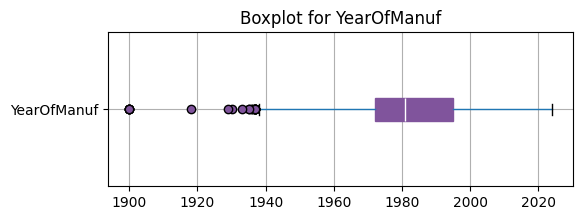

In [141]:
plt.figure(figsize=(6, 2))
df.boxplot(column="YearOfManuf", vert=False, patch_artist=True,
             boxprops=dict(facecolor="#80549c", color="#80549c"),  
             flierprops=dict(markerfacecolor="#80549c", markeredgecolor="black"),
             medianprops=dict(color="white"))  
plt.title(f"Boxplot for YearOfManuf")
plt.show()

In [142]:
#Mean and standard deviation
mean_year = df['YearOfManuf'].mean()
std_year = df['YearOfManuf'].std()

#Identifying rows that are not outliers
non_outliers = (df['YearOfManuf'] >= mean_year - 3 * std_year) & (df['YearOfManuf'] <= mean_year + 3 * std_year)

#Deleting outliers
df_cleaned = df[non_outliers].copy()

#Number of rows after and before
print(f"Original DataFrame length: {len(df)}")
print(f"Cleaned DataFrame length: {len(df_cleaned)}")


Original DataFrame length: 47791
Cleaned DataFrame length: 47783


In [143]:
df = df_cleaned.copy()

### OccDate

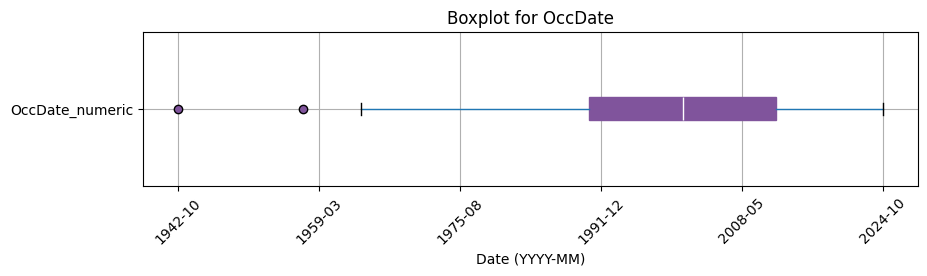

In [145]:

df['OccDate'] = pd.to_datetime(df['OccDate'], errors='coerce')

#Dates to numeric values
df['OccDate_numeric'] = df['OccDate'].astype('int64') // 10**9 

plt.figure(figsize=(10, 2))
df.boxplot(column="OccDate_numeric", vert=False, patch_artist=True,
           boxprops=dict(facecolor="#80549c", color="#80549c"),
           flierprops=dict(markerfacecolor="#80549c", markeredgecolor="black"),
           medianprops=dict(color="white"))
plt.title("Boxplot for OccDate")

#Show graph
min_timestamp = df['OccDate_numeric'].min()
max_timestamp = df['OccDate_numeric'].max()
ticks = np.linspace(min_timestamp, max_timestamp, num=6)  # Crear 6 ticks espaciados
tick_labels = pd.to_datetime(ticks, unit='s').strftime('%Y-%m')  # Convertir a fechas legibles
plt.xticks(ticks=ticks, labels=tick_labels, rotation=45)  # Cambiar etiquetas y rotarlas
plt.xlabel("Date (YYYY-MM)")

plt.show()


In [146]:
Q1 = df['OccDate_numeric'].quantile(0.25)
Q3 = df['OccDate_numeric'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['OccDate_numeric'] >= lower_bound) & (df['OccDate_numeric'] <= upper_bound)].copy()

print(f"Original DataFrame length: {len(df)}")
print(f"Cleaned DataFrame length: {len(df_cleaned)}")

Original DataFrame length: 47783
Cleaned DataFrame length: 47781


In [147]:
df = df_cleaned.drop(columns=["OccDate_numeric"]).copy()

### <font color='purple'>FullData_V2</font>
Contains the dataset with features to use 

In [149]:
exportDataVersion(df, 2)

File fullData_V2.csv created
